In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from tabs import TorsionInfoList, GetTorsionProfilesFromMDTraj
import mdtraj as md

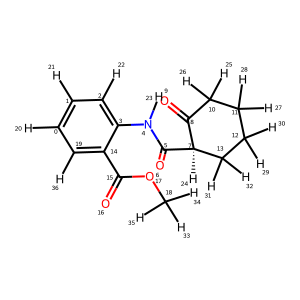

In [2]:
mol = Chem.AddHs(Chem.MolFromSmiles("[H]c1c([H])c([H])c(N([H])C(=O)[C@@]2([H])C(=O)C([H])([H])C([H])([H])C([H])([H])C2([H])[H])c(C(=O)OC([H])([H])[H])c1[H]"))
IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.molSize = 300,300
mol

In [3]:
torInfo = TorsionInfoList.WithTorsionLibs(mol)

In [4]:
torInfo.smarts

['[O:1]=[C:2]!@;-[O:3]~[C:4]',
 '[$(C=O):1][NX3:2]!@;-[!#1:3][!#1:4]',
 '[O:1]=[CX3:2]!@;-[NX3H1:3][!#1:4]',
 '[C:1][CX4:2]!@;-[CX3:3]=[O:4]',
 '[$([cH0]!@;-[*^2]):1][c:2]([cH1])!@[CX3:3]=[O:4]',
 '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[C^2;r{5-6}:2]@;-[C;r{5-6}:3]@[!#1;r{5-8}:4]',
 '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[C^2,c,x4;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]',
 '[!#1;r{5-8}:1]@[CX4;r{5-8}:2]@;-[CX4;r{5-8}:3]@[!#1;r{5-8}:4]']

In [5]:
torInfo.indices

[[16, 15, 17, 18],
 [5, 4, 3, 2],
 [6, 5, 4, 3],
 [8, 7, 5, 6],
 [3, 14, 15, 16],
 [7, 8, 10, 11],
 [10, 8, 7, 13],
 [8, 7, 13, 12],
 [8, 10, 11, 12],
 [7, 13, 12, 11],
 [10, 11, 12, 13]]

In [6]:
torInfo.multiplicities

[1, 4, 1, 3, 2, 3, 3, 6, 6, 3, 3]

In [7]:
torInfo.bounds

[array([3.14159265]),
 array([0.78539816, 2.35619449, 3.92699082, 5.49778714]),
 array([3.14159265]),
 array([1.04719755, 3.14159265, 5.21853446]),
 array([1.57079633, 4.71238898]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.52359878, 1.57079633, 2.60054059, 3.64773814, 4.71238898,
        5.75958653]),
 array([0.52359878, 1.57079633, 2.60054059, 3.64773814, 4.71238898,
        5.75958653]),
 array([0.       , 2.0943951, 4.1887902]),
 array([0.       , 2.0943951, 4.1887902])]

In [8]:
torInfo.torsionTypes

[<TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.REGULAR: 1>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>,
 <TorsionType.SMALL_RING: 2>]

In [9]:
customProfiles = GetTorsionProfilesFromMDTraj(md.load("../Data/CustomTABS/conformational_ensemble_smiles_id_0_openff200_tip3p_0_161311_output_stripped.h5"), torInfo.indices)
customProfiles.shape

/localhome/braunje/.conda/envs/tabs/lib/python3.10/site-packages/mdtraj/core/trajectory.py:441: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn("top= kwargs ignored since this file parser does not support it")


(250000, 11)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
from tabs import fits

In [12]:
binsize = np.pi*2/36
yHists, yHistsCount, xHist = fits.ComputeTorsionHistograms(customProfiles,binsize)

In [13]:
xHist[2]

0.4363323129985824

In [14]:
coeffs, peaks = fits.ComputeGaussianFit(xHist,yHists[3],yHistsCount[3],binsize)

peaksInitial [11, 29]
peakPairs [(11, 29), (29, 11)]
binEdges [18, 4]
1.9198621771937625 {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17} 2.0071286397934784 0.06335946001734419 0.1591218388637324
5.061454830783555 {0, 1, 2, 3, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35} 5.148721293383271 0.1755312352884982 0.5133014295017999
center 2.0071286397934784
center 5.148721293383271


In [15]:
coeffs

array([[0.15009036, 2.00712864, 0.61189847],
       [0.51982928, 5.14872129, 0.87553124]])

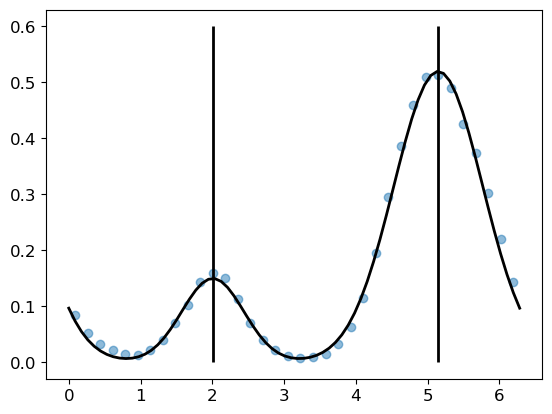

In [16]:
plt.scatter(xHist, yHists[3], alpha=0.5)
xfit = np.linspace(0, 2*np.pi, 72)
# yfit = fits.FitFunc.GAUSS.call(coeffsDjahan, xfit)
yfit2 = fits.FitFunc.GAUSS.call(coeffs, xfit)
# plt.plot(xfit, yfit, 'r-', lw=2)
plt.plot(xfit, yfit2, 'k-', lw=2)
plt.vlines(xHist[11], 0, 0.6, colors='k', lw=2)
plt.vlines(xHist[29], 0, 0.6, colors='k', lw=2)

id: 0
peaksInitial [0]
peakPairs [(0, 0)]
binEdges [18]
6.1086523819801535 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35} 6.283185307179586 0.28416528964437915 1.3646250398189843
center 6.283185307179586
id: 1
peaksInitial [4, 11, 24, 31]
peakPairs [(4, 11), (11, 24), (24, 31), (31, 4)]
binEdges [10, 17, 25, 35]
0.6981317007977318 {0, 1, 2, 35, 3, 4, 5, 6, 7, 8, 9} 0.7853981633974482 0.2408775524518932 0.6124231280594342
1.9198621771937625 {10, 11, 12, 13, 14, 15, 16} 2.0071286397934784 0.009475047393880194 0.04434693334312577
4.1887902047863905 {17, 18, 19, 20, 21, 22, 23, 24} 4.276056667386106 0.009994979013392576 0.04276556982856469
5.410520681182422 {32, 33, 34, 25, 26, 27, 28, 29, 30, 31} 5.497787143782137 0.20250142425263265 0.589206878200734
center 0.7853981633974482
center 2.0071286397934784
center 4.276056667386106
center 5.497787143782137
id: 2
peaksInitial [0]
peakPairs [(0, 0)]
binEdges 

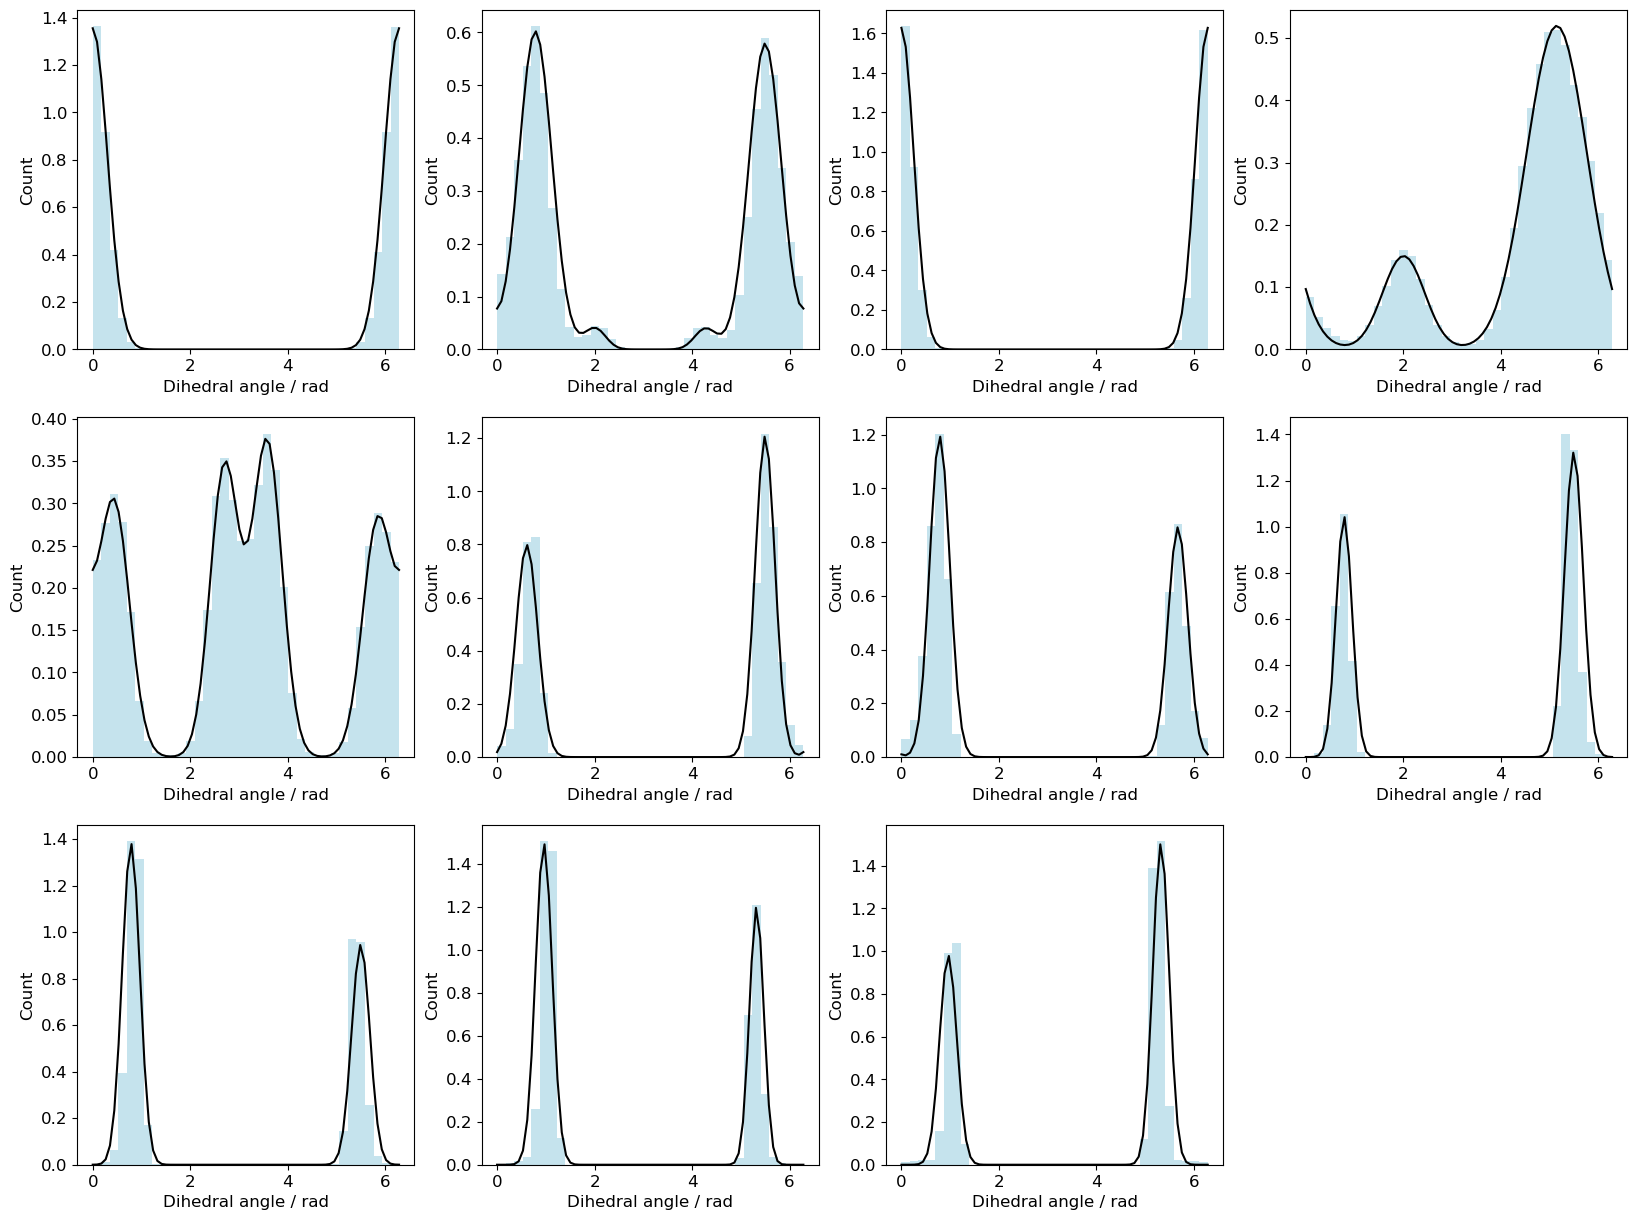

In [17]:
torInfo2 = TorsionInfoList.WithCustomTorsions(mol, torInfo.indices, customProfiles, showFits=True)